# COMP2200 Data science group project - Group 50

#### Malaria and the Factors Affecting its Spread

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
malaria = pd.read_csv("files/malaria_data")
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [3]:
avg_temp = pd.read_csv("files/average_yearly_temperature.csv")
avg_temp.head()

,Unnamed: 0,Country name,Average yearly temperature (° C),Unnamed: 3
0,1,Aruba,25.35,NaN
1,2,Andorra,7.60,NaN
2,3,Afghanistan,12.60,NaN
3,4,Angola,21.55,NaN
4,5,Albania,11.40,NaN


In [4]:
HDI = pd.read_csv("files/HDI.csv")
HDI.head()

,HDI Rank,Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,...,Unnamed: 51,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59,2019
0,169,Afghanistan,0.302,NaN,0.307,NaN,0.316,NaN,0.312,NaN,...,NaN,0.5,NaN,0.502,NaN,0.506,NaN,0.509,NaN,0.511
1,69,Albania,0.65,NaN,0.631,NaN,0.615,NaN,0.618,NaN,...,NaN,0.788,NaN,0.788,NaN,0.790,NaN,0.792,NaN,0.795
2,91,Algeria,0.572,NaN,0.576,NaN,0.582,NaN,0.586,NaN,...,NaN,0.74,NaN,0.743,NaN,0.745,NaN,0.746,NaN,0.748
3,36,Andorra,..,NaN,..,NaN,..,NaN,..,NaN,...,NaN,0.862,NaN,0.866,NaN,0.863,NaN,0.867,NaN,0.868
4,148,Angola,..,NaN,..,NaN,..,NaN,..,NaN,...,NaN,0.572,NaN,0.578,NaN,0.582,NaN,0.582,NaN,0.581


In [5]:
GDP = pd.read_csv("files/GDP Per Capita.csv")
GDP.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020,30253.279360,NaN,NaN
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


### Data cleaning

In [6]:
#Remove any NaN and infinite values from malaria table
malaria.replace([np.inf, -np.inf], np.nan, inplace=True)
malaria.dropna(inplace=True)
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
10,Bolivia (Plurinational State of),2017,6512[4900-8300],2[0-4],6512,4900.0,8300.0,2,0.0,4.0,Americas


In [7]:
#Remove unnecessary columns from average temperature table
avg_temp = avg_temp.drop(columns=['Unnamed: 0', 'Unnamed: 3'])
avg_temp.head()

,Country name,Average yearly temperature (° C)
0,Aruba,25.35
1,Andorra,7.60
2,Afghanistan,12.60
3,Angola,21.55
4,Albania,11.40


In [8]:
#Remove unnecessary columns (including years that are not included in our malaria data)
#from HDI table, as well as any NaN/infinite values
HDI = HDI.drop(columns=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',  
                        '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 
                        '2010', '2018', '2019'])
HDI.drop(list(HDI.filter(regex = 'Unnamed')), axis = 1, inplace = True)
HDI.replace([np.inf, -np.inf], np.nan, inplace=True)
HDI.dropna(inplace=True)
HDI.head()

,HDI Rank,Country,2011,2012,2013,2014,2015,2016,2017
0,169,Afghanistan,0.477,0.489,0.496,0.5,0.5,0.502,0.506
1,69,Albania,0.764,0.775,0.782,0.787,0.788,0.788,0.790
2,91,Algeria,0.728,0.728,0.729,0.736,0.74,0.743,0.745
3,36,Andorra,0.836,0.858,0.856,0.863,0.862,0.866,0.863
4,148,Angola,0.533,0.544,0.555,0.565,0.572,0.578,0.582


In [9]:
#Remove unnecessary columns (irrelevant years) and NaN/infinite values
GDP = GDP.drop(columns=['2018', '2019', '2020'])
GDP.replace([np.inf, -np.inf], np.nan, inplace=True)
GDP.dropna(inplace=True)
GDP.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057


#### Removing Outliers

#### Checking For outliers

[Text(0.5, 1.0, 'Median Number of Cases BoxPlot - Tens of Millions')]

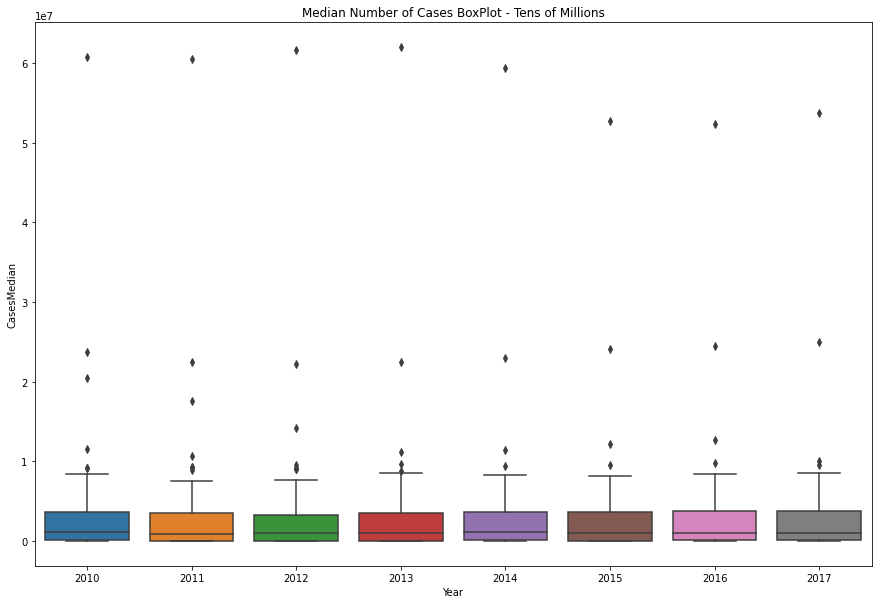

In [10]:
f, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = "Year", y = "CasesMedian", data = malaria).set(title = 'Median Number of Cases BoxPlot - Tens of Millions')

In [11]:
M2014 = malaria[malaria['Year'] == 2014]
columns = ['Country', 'CasesMedian', 'WHORegion']
print(M2014[columns][(M2014['CasesMedian'] > 10000000)])

                              Country  CasesMedian        WHORegion
348  Democratic Republic of the Congo     23031390           Africa
368                             India     11420000  South-East Asia
390                           Nigeria     59365039           Africa


[Text(0.5, 1.0, 'Median Number of Deaths BoxPlot')]

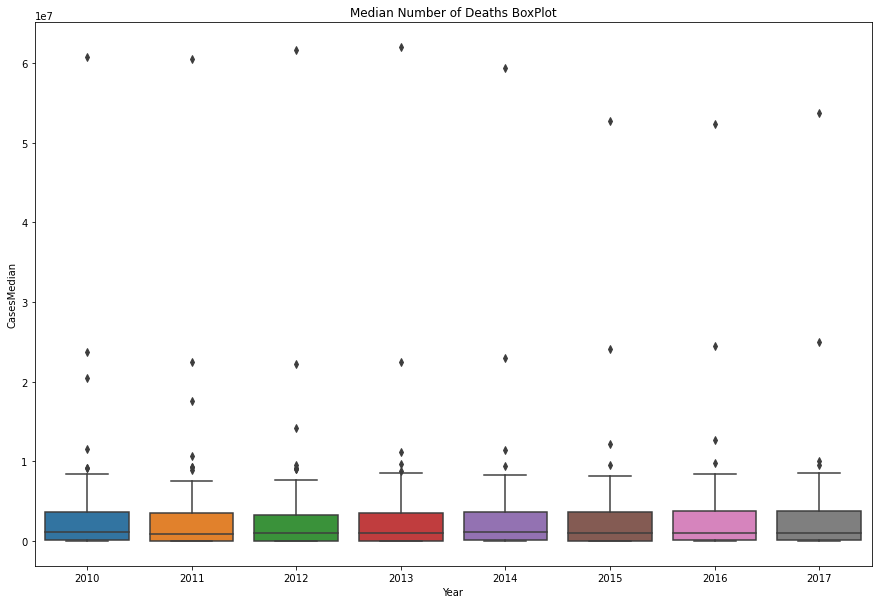

In [12]:
f, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = "Year", y = "CasesMedian", data = malaria).set(title = 'Median Number of Deaths BoxPlot')

#### Analysis of outliers

The box plots above highlight the spread of the median number of cases and median number of deaths per year in different countries respectively. This is to check for any outliers if there are any. The outliers from the different years are not genuine outliers which need to be removed as those are highlighting the cases within hotspots meaning that, that data is necessary for the analysis. This is further reinforced by the lack of volatility of the outliers from year to year. The same can be said for the box plots for the median number of deaths from year to year. The outliers highlight the deaths in the hotspots and there is no volatility from year to year hence there are no outliers to remove!

##### Combining Data

In [13]:
avg_temp = avg_temp.rename(columns = {'Country name' : 'Country'})
avg_temp

,Country,Average yearly temperature (° C)
0,Aruba,25.35
1,Andorra,7.60
2,Afghanistan,12.60
3,Angola,21.55
4,Albania,11.40
...,...,...
206,"Yemen, Rep.",23.85
207,South Africa,17.75
208,"Congo, Dem. Rep.",24.00
209,Zambia,21.40


In [14]:
HDI = HDI.drop(columns=['HDI Rank'])
HDI

,Country,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.477,0.489,0.496,0.5,0.5,0.502,0.506
1,Albania,0.764,0.775,0.782,0.787,0.788,0.788,0.790
2,Algeria,0.728,0.728,0.729,0.736,0.74,0.743,0.745
3,Andorra,0.836,0.858,0.856,0.863,0.862,0.866,0.863
4,Angola,0.533,0.544,0.555,0.565,0.572,0.578,0.582
...,...,...,...,...,...,...,...,...
184,Venezuela (Bolivarian Republic of),0.769,0.772,0.777,0.775,0.769,0.759,0.743
185,Viet Nam,0.671,0.676,0.681,0.683,0.688,0.693,0.696
186,Yemen,0.506,0.504,0.509,0.502,0.483,0.474,0.467
187,Zambia,0.534,0.549,0.557,0.561,0.569,0.571,0.578


In [15]:
HDI_2011 = HDI[["Country", "2011"]]
HDI_2012 = HDI[["Country", "2012"]]
HDI_2013 = HDI[["Country", "2013"]]
HDI_2014 = HDI[["Country", "2014"]]
HDI_2015 = HDI[["Country", "2015"]]
HDI_2016 = HDI[["Country", "2016"]]
HDI_2017 = HDI[["Country", "2017"]]

In [16]:
GDP = GDP.rename(columns={'Country Name' : 'Country'})
GDP

,Country,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057
...,...,...,...,...,...,...,...,...
261,Kosovo,3741.875052,3596.804655,3891.266363,4080.330717,3603.025501,3780.003689,4045.614209
262,"Yemen, Rep.",1374.621401,1446.536472,1607.152173,1674.002572,1601.830063,1138.603723,960.528848
263,South Africa,8007.476439,7501.661096,6832.725546,6433.400402,5734.633422,5272.543648,6131.479450
264,Zambia,1672.907535,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574


In [17]:
GDP_2011 = GDP[["Country", "2011"]]
GDP_2012 = GDP[["Country", "2012"]]
GDP_2013 = GDP[["Country", "2013"]]
GDP_2014 = GDP[["Country", "2014"]]
GDP_2015 = GDP[["Country", "2015"]]
GDP_2016 = GDP[["Country", "2016"]]
GDP_2017 = GDP[["Country", "2017"]]

In [18]:
new_malaria = malaria.drop(columns=['Cases', 'Deaths', 'CasesMin', 'CasesMax', 'DeathsMin', 'DeathsMax'])

In [19]:
new_malaria.head()

,Country,Year,CasesMedian,DeathsMedian,WHORegion
0,Afghanistan,2017,630308,298,Eastern Mediterranean
2,Angola,2017,4615605,13316,Africa
6,Bangladesh,2017,32924,76,South-East Asia
8,Benin,2017,4111699,7328,Africa
10,Bolivia (Plurinational State of),2017,6512,2,Americas


In [20]:
M2010 = new_malaria[new_malaria["Year"] == 2010]
M2011 = new_malaria[new_malaria["Year"] == 2011]
M2012 = new_malaria[new_malaria["Year"] == 2012]
M2013 = new_malaria[new_malaria["Year"] == 2013]
M2014 = new_malaria[new_malaria["Year"] == 2014]
M2015 = new_malaria[new_malaria["Year"] == 2015]
M2016 = new_malaria[new_malaria["Year"] == 2016]
M2017 = new_malaria[new_malaria["Year"] == 2017]

In [21]:
new_malaria = M2010

In [22]:
new_malaria.head()

,Country,Year,CasesMedian,DeathsMedian,WHORegion
749,Afghanistan,2010,353343,200,Eastern Mediterranean
751,Angola,2010,3125901,13351,Africa
755,Bangladesh,2010,113895,274,South-East Asia
757,Benin,2010,3713395,8273,Africa
759,Bolivia (Plurinational State of),2010,19614,11,Americas


In [23]:
# M2010 = M2010.drop(columns=['Year', 'WHORegion'])
M2011 = M2011.drop(columns=['Year', 'WHORegion'])
M2012 = M2012.drop(columns=['Year', 'WHORegion'])
M2013 = M2013.drop(columns=['Year', 'WHORegion'])
M2014 = M2014.drop(columns=['Year', 'WHORegion'])
M2015 = M2015.drop(columns=['Year', 'WHORegion'])
M2016 = M2016.drop(columns=['Year', 'WHORegion'])
M2017 = M2017.drop(columns=['Year', 'WHORegion'])

In [24]:
new_malaria = new_malaria.drop(columns=['Year', 'CasesMedian', 'DeathsMedian'])

In [25]:
new_malaria = pd.merge(new_malaria, avg_temp, on='Country')
new_malaria = pd.merge(new_malaria, M2011, on='Country')

In [26]:
# new_malaria = pd.merge(new_malaria, GDP_2011, on='Country')
# new_malaria = pd.merge(new_malaria, HDI_2011, on='Country')

In [27]:
# new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'CasesMedian_2010', 'DeathsMedian' : 'DeathsMedian_2010', '2011' : 'HDI_2011'})
# new_malaria = new_malaria.rename(columns={'2011' : 'GDP_2011'})

In [28]:
# new_malaria = pd.merge(new_malaria, M2011, on='Country')

In [29]:
# new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'CasesMedian_2011', 'DeathsMedian' : 'DeathsMedian_2011'})

In [30]:
# new_malaria = pd.merge(new_malaria, M2012, on='Country')

In [31]:
# new_malaria

In [32]:
# _2011 = pd.merge(GDP_2011, HDI_2011, on='Country')

In [33]:
# _2011

# RFE Analysis

Region vs number of infections

In [34]:
from sklearn.feature_selection import RFE

# K Nearest neighbour Analysis

Which variables are the most significant in relation to the spread of malaria?

# Data Visualisation

#### Heatmaps

Display infections in the region

C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.0% of the points

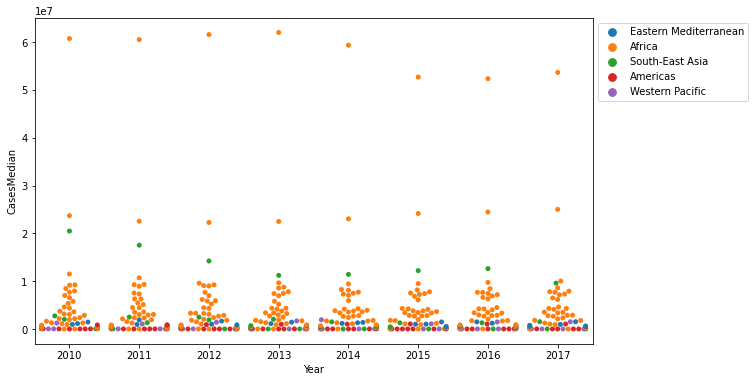

In [35]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'Year', y = 'CasesMedian', data = malaria, hue = 'WHORegion')
plt.legend(bbox_to_anchor= (1, 1), loc = 2)

# Algorithms

Model the effectiveness of preventative measures on the prevalence of the disease